<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/Time_Series/%EA%B8%88%EC%9C%B5%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EC%BF%A1%EB%B6%81/8%EC%9E%A5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9C%BC%EB%A1%9C_%EB%94%94%ED%8F%B4%ED%8A%B8_%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [1]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import missingno

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [8]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from lightgbm import LGBMClassifier
from sklearn import metrics

from io import StringIO
import seaborn as sns
from ipywidgets import Image
import pydotplus 

In [9]:
from sklearn.pipeline import Pipeline

In [10]:
from sklearn.model_selection import (GridSearchCV, cross_val_score, 
                                     RandomizedSearchCV, cross_validate, 
                                     StratifiedKFold)

# 데이터 로드 및 데이터 유형 관리

In [11]:
!head -n 5 credit_card_default.csv

,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,payment_status_apr,bill_statement_sep,bill_statement_aug,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,20000,Female,University,Married,24,Payment delayed 2 months,Payment delayed 2 months,Payed duly,Payed duly,Unknown,Unknown,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26,Payed duly,Payment delayed 2 months,Unknown,Unknown,Unknown,Payment delayed 2 months,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,University,Married,37,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,46990

In [12]:
df = pd.read_csv('/content/credit_card_default.csv', index_col = 0, na_values = '')

In [13]:
df.head()

,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,...,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,20000,Female,University,Married,24.0,Payment delayed 2 months,Payment delayed 2 months,Payed duly,Payed duly,Unknown,...,0,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26.0,Payed duly,Payment delayed 2 months,Unknown,Unknown,Unknown,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34.0,Unknown,Unknown,Unknown,Unknown,Unknown,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,University,Married,37.0,Unknown,Unknown,Unknown,Unknown,Unknown,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,University,Married,57.0,Payed duly,Unknown,Payed duly,Unknown,Unknown,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
x = df.copy()
y = x.pop('default_payment_next_month')

In [15]:
x.shape, y.shape

((30000, 23), (30000,))

# 탐색적 데이터 분석

In [16]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1000000.0
age,29850.0,35.49,9.22,21.0,28.00,34.0,41.00,79.0
bill_statement_sep,30000.0,51223.33,73635.86,-165580.0,3558.75,22381.5,67091.00,964511.0
bill_statement_aug,30000.0,49179.08,71173.77,-69777.0,2984.75,21200.0,64006.25,983931.0
bill_statement_jul,30000.0,47013.15,69349.39,-157264.0,2666.25,20088.5,60164.75,1664089.0
bill_statement_jun,30000.0,43262.95,64332.86,-170000.0,2326.75,19052.0,54506.00,891586.0
bill_statement_may,30000.0,40311.40,60797.16,-81334.0,1763.00,18104.5,50190.50,927171.0
bill_statement_apr,30000.0,38871.76,59554.11,-339603.0,1256.00,17071.0,49198.25,961664.0
previous_payment_sep,30000.0,5663.58,16563.28,0.0,1000.00,2100.0,5006.00,873552.0
previous_payment_aug,30000.0,5921.16,23040.87,0.0,833.00,2009.0,5000.00,1684259.0


In [17]:
df.describe(include = 'object').T

,count,unique,top,freq
sex,29850,2,Female,18027
education,29850,4,University,13960
marriage,29850,3,Single,15891
payment_status_sep,30000,10,Unknown,17496
payment_status_aug,30000,10,Unknown,19512
payment_status_jul,30000,10,Unknown,19849
payment_status_jun,30000,10,Unknown,20803
payment_status_may,30000,9,Unknown,21493
payment_status_apr,30000,9,Unknown,21181


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


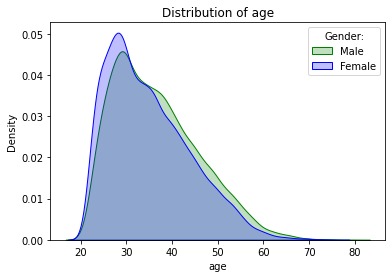

In [18]:
fig, ax = plt.subplots()

sns.distplot(df.loc[df.sex=='Male', 'age'].dropna(), 
             hist=False, color='green', 
             kde_kws={'shade': True},
             ax=ax, label='Male')

sns.distplot(df.loc[df.sex=='Female', 'age'].dropna(), 
             hist=False, color='blue', 
             kde_kws={'shade': True},
             ax=ax, label='Female')

ax.set_title('Distribution of age')
ax.legend(title='Gender:')

Text(0.5, 1.05, 'Pairplot of selected variables')

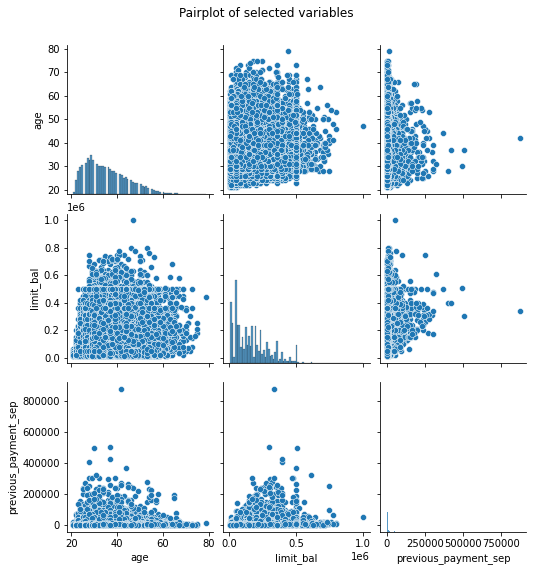

In [19]:
pair_plot = sns.pairplot(df[['age', 'limit_bal', 'previous_payment_sep']])
pair_plot.fig.suptitle('Pairplot of selected variables', y=1.05)

In [20]:
def plot_correlation_matrix(corr_mat):
    
    sns.set(style='white')

    mask = np.zeros_like(corr_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    fig, ax = plt.subplots()

    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

    sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, 
                cbar_kws={'shrink': .5}, ax=ax)
    ax.set_title('Correlation Matrix', fontsize=16)

    sns.set(style='darkgrid')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


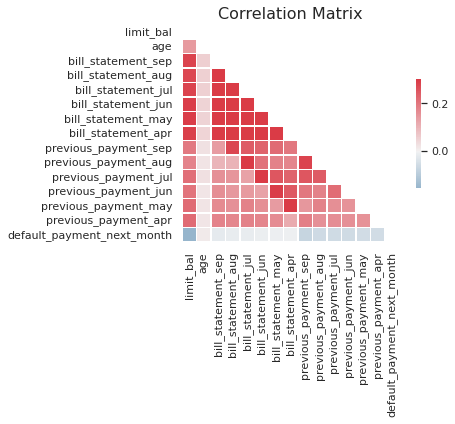

In [21]:
corr_mat = df.select_dtypes(include='number').corr()    
plot_correlation_matrix(corr_mat)

Text(0.5, 1.0, 'Distribution of limit balance per education level')

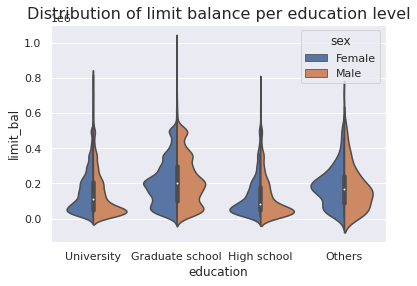

In [22]:
ax = sns.violinplot(x='education',
                    y='limit_bal', 
                    hue='sex',
                    split=True,
                    data=df)

ax.set_title('Distribution of limit balance per education level', 
             fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the target variable')

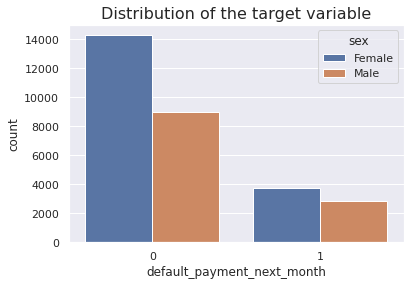

In [23]:
ax = sns.countplot('default_payment_next_month',
                   hue='sex', 
                   data=df,
                   orient='h')

ax.set_title('Distribution of the target variable', fontsize=16)

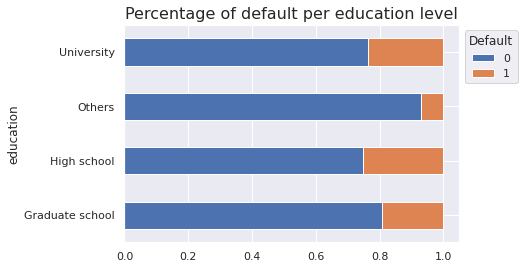

In [24]:
ax = df.groupby('education')['default_payment_next_month'] \
       .value_counts(normalize=True) \
       .unstack() \
       .plot(kind='barh', stacked='True')

ax.set_title('Percentage of default per education level', 
             fontsize=16)

ax.legend(title='Default', bbox_to_anchor=(1,1)) 

# 훈련 및 테스트 집합으로 데이터 분할

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

In [26]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.778792
1    0.221208
Name: default_payment_next_month, dtype: float64
0    0.778833
1    0.221167
Name: default_payment_next_month, dtype: float64


# 결측치 처리

In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   limit_bal             30000 non-null  int64  
 1   sex                   29850 non-null  object 
 2   education             29850 non-null  object 
 3   marriage              29850 non-null  object 
 4   age                   29850 non-null  float64
 5   payment_status_sep    30000 non-null  object 
 6   payment_status_aug    30000 non-null  object 
 7   payment_status_jul    30000 non-null  object 
 8   payment_status_jun    30000 non-null  object 
 9   payment_status_may    30000 non-null  object 
 10  payment_status_apr    30000 non-null  object 
 11  bill_statement_sep    30000 non-null  int64  
 12  bill_statement_aug    30000 non-null  int64  
 13  bill_statement_jul    30000 non-null  int64  
 14  bill_statement_jun    30000 non-null  int64  
 15  bill_statement_may 

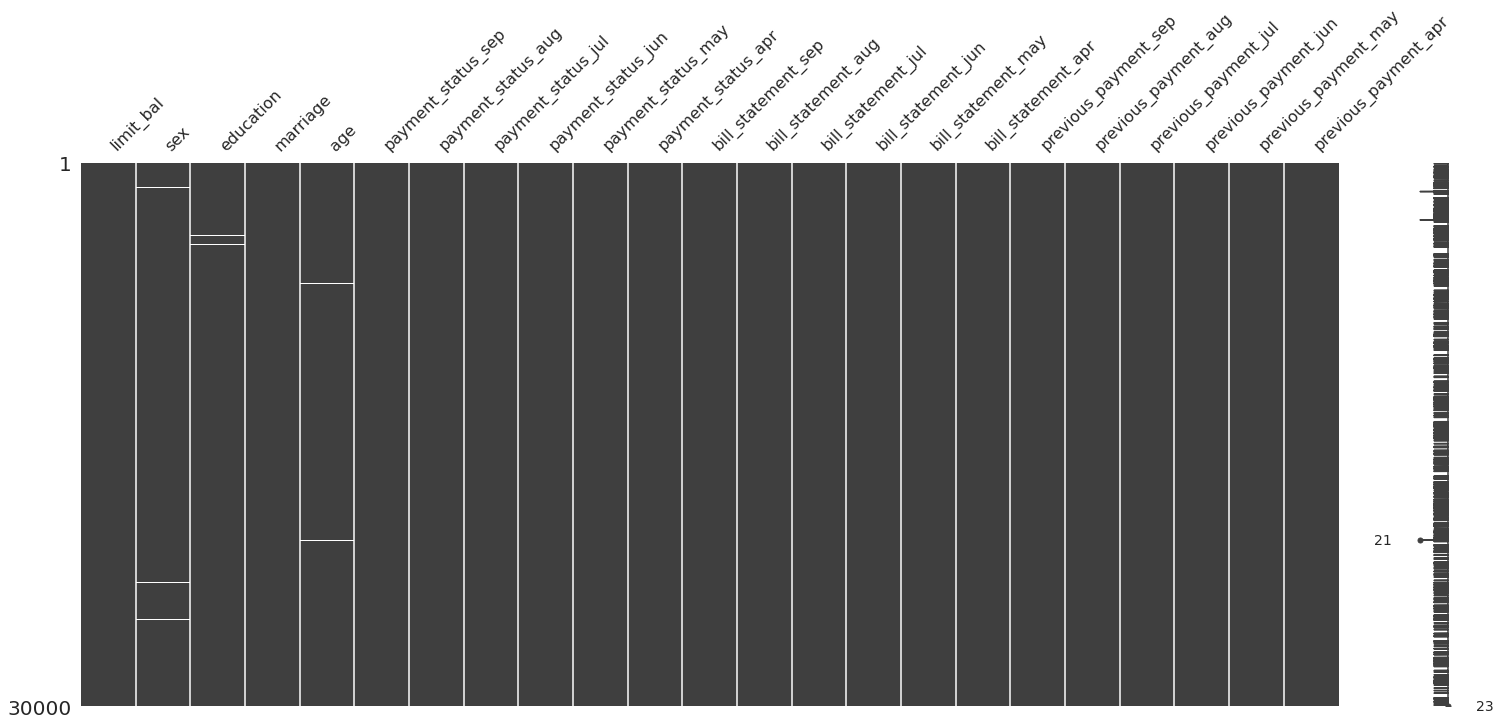

In [28]:
missingno.matrix(x)

In [29]:
NUM_FEATURES = ['age']
CAT_FEATURES = ['sex', 'education', 'marriage']

In [30]:
for col in NUM_FEATURES:

    num_imputer = KNNImputer()
    num_imputer.fit(X_train[[col]])
    
    X_train.loc[:, col] = num_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = num_imputer.transform(X_test[[col]])

In [31]:
X_train.isnull().sum()

limit_bal                 0
sex                     126
education               114
marriage                111
age                       0
payment_status_sep        0
payment_status_aug        0
payment_status_jul        0
payment_status_jun        0
payment_status_may        0
payment_status_apr        0
bill_statement_sep        0
bill_statement_aug        0
bill_statement_jul        0
bill_statement_jun        0
bill_statement_may        0
bill_statement_apr        0
previous_payment_sep      0
previous_payment_aug      0
previous_payment_jul      0
previous_payment_jun      0
previous_payment_may      0
previous_payment_apr      0
dtype: int64

In [32]:
for col in CAT_FEATURES:

    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer.fit(X_train[[col]])
    
    X_train.loc[:, col] = cat_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = cat_imputer.transform(X_test[[col]])

In [33]:
X_train.isnull().sum()

limit_bal               0
sex                     0
education               0
marriage                0
age                     0
payment_status_sep      0
payment_status_aug      0
payment_status_jul      0
payment_status_jun      0
payment_status_may      0
payment_status_apr      0
bill_statement_sep      0
bill_statement_aug      0
bill_statement_jul      0
bill_statement_jun      0
bill_statement_may      0
bill_statement_apr      0
previous_payment_sep    0
previous_payment_aug    0
previous_payment_jul    0
previous_payment_jun    0
previous_payment_may    0
previous_payment_apr    0
dtype: int64

# 범주형 변수 인코딩

In [34]:
COL = 'education'

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

label_enc = LabelEncoder()
label_enc.fit(X_train_copy[COL])

X_train_copy.loc[:, COL] = label_enc.transform(X_train_copy[COL])
X_test_copy.loc[:, COL] = label_enc.transform(X_test_copy[COL])

In [35]:
CAT_FEATURES = X_train.select_dtypes(include='object') \
                      .columns \
                      .to_list()

CAT_FEATURES

['sex',
 'education',
 'marriage',
 'payment_status_sep',
 'payment_status_aug',
 'payment_status_jul',
 'payment_status_jun',
 'payment_status_may',
 'payment_status_apr']

In [36]:
one_hot_encoder = OneHotEncoder(sparse=False, 
                                handle_unknown='error', 
                                drop='first')

one_hot_encoder

OneHotEncoder(drop='first', sparse=False)

In [37]:
one_hot_transformer = ColumnTransformer([("one_hot", one_hot_encoder, CAT_FEATURES)])
one_hot_transformer

ColumnTransformer(transformers=[('one_hot',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['sex', 'education', 'marriage',
                                  'payment_status_sep', 'payment_status_aug',
                                  'payment_status_jul', 'payment_status_jun',
                                  'payment_status_may',
                                  'payment_status_apr'])])

In [38]:
one_hot_transformer.fit(X_train)

ColumnTransformer(transformers=[('one_hot',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['sex', 'education', 'marriage',
                                  'payment_status_sep', 'payment_status_aug',
                                  'payment_status_jul', 'payment_status_jun',
                                  'payment_status_may',
                                  'payment_status_apr'])])

In [39]:
col_names = one_hot_transformer.get_feature_names()

X_train_cat = pd.DataFrame(one_hot_transformer.transform(X_train), 
                           columns=col_names, 
                           index=X_train.index)

X_train_ohe = pd.concat([X_train, X_train_cat], axis=1) \
                .drop(CAT_FEATURES, axis=1)

X_test_cat = pd.DataFrame(one_hot_transformer.transform(X_test), 
                          columns=col_names, 
                          index=X_test.index)

X_test_ohe = pd.concat([X_test, X_test_cat], axis=1) \
               .drop(CAT_FEATURES, axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 의사결정 트리 분류기 적합화

In [40]:
tree_classifier = LGBMClassifier()

tree_classifier.fit(X_train_ohe, y_train)
y_pred = tree_classifier.predict(X_test_ohe)

In [41]:
def performance_evaluation_report(model, X_test, y_test, show_plot=False, labels=None, show_pr_curve=False):

    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    cm = metrics.confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
    roc_auc = metrics.auc(fpr, tpr)

    precision, recall, thresholds = metrics.precision_recall_curve(
        y_test, y_pred_prob)
    pr_auc = metrics.auc(recall, precision)

    if show_plot:

        if labels is None:
            labels = ['Negative', 'Positive']

        N_SUBPLOTS = 3 if show_pr_curve else 2
        PLOT_WIDTH = 15 if show_pr_curve else 12
        PLOT_HEIGHT = 5 if show_pr_curve else 6

        fig, ax = plt.subplots(
            1, N_SUBPLOTS, figsize=(PLOT_WIDTH, PLOT_HEIGHT))
        fig.suptitle('Performance Evaluation', fontsize=16)

        sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='BuGn_r', square=True, cbar=False, ax=ax[0],
                    annot_kws={"ha": 'center', "va": 'center'})
        ax[0].set(xlabel='Predicted label',
                  ylabel='Actual label', title='Confusion Matrix')
        ax[0].xaxis.set_ticklabels(labels)
        ax[0].yaxis.set_ticklabels(labels)

        ax[1].plot(fpr, tpr, 'b-', label=f'ROC-AUC = {roc_auc:.2f}')
        ax[1].set(xlabel='False Positive Rate',
                  ylabel='True Positive Rate', title='ROC Curve')
        ax[1].plot(fp/(fp+tn), tp/(tp+fn), 'ro',
                   markersize=8, label='Decision Point')
        ax[1].plot([0, 1], [0, 1], 'r--')
        ax[1].legend(loc='lower right')

        if show_pr_curve:

            ax[2].plot(recall, precision, label=f'PR-AUC = {pr_auc:.2f}')
            ax[2].set(xlabel='Recall', ylabel='Precision',
                      title='Precision-Recall Curve')
            ax[2].legend()

    stats = {'accuracy': metrics.accuracy_score(y_test, y_pred),
             'precision': metrics.precision_score(y_test, y_pred),
             'recall': metrics.recall_score(y_test, y_pred),
             'specificity': (tn / (tn + fp)),
             'f1_score': metrics.f1_score(y_test, y_pred),
             'cohens_kappa': metrics.cohen_kappa_score(y_test, y_pred),
             'roc_auc': roc_auc,
             'pr_auc': pr_auc}

    return stats

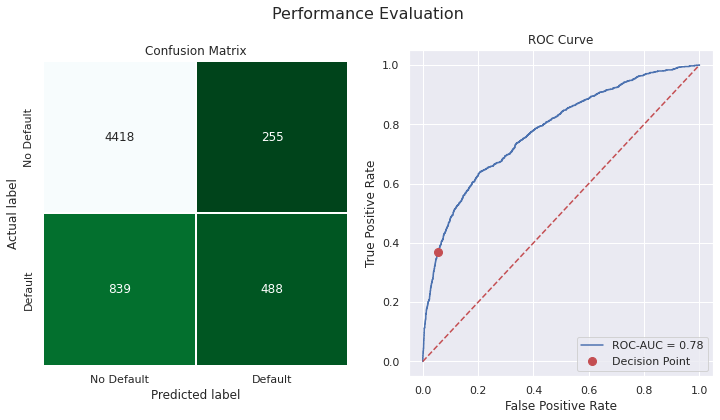

In [42]:
LABELS = ['No Default', 'Default']
tree_perf = performance_evaluation_report(tree_classifier, 
                                          X_test_ohe, 
                                          y_test, labels=LABELS, 
                                          show_plot=True)

In [43]:
y_pred_prob = tree_classifier.predict_proba(X_test_ohe)[:, 1]

In [44]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, 
                                                               y_pred_prob)

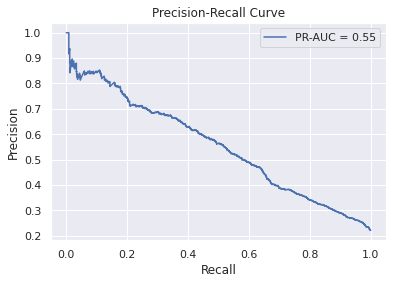

In [45]:
ax = plt.subplot()
ax.plot(recall, precision, 
        label=f'PR-AUC = {metrics.auc(recall, precision):.2f}')
ax.set(title='Precision-Recall Curve', 
       xlabel='Recall', 
       ylabel='Precision')
ax.legend()

# 파이프라인 구현

In [46]:
num_features = X_train.select_dtypes(include='number') \
                      .columns \
                      .to_list()
                      
cat_features = X_train.select_dtypes(include='object') \
                      .columns \
                      .to_list()

In [47]:
num_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer())
])

cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(categories=cat_list, sparse=False, 
                             handle_unknown='error', drop='first'))
])

In [48]:
preprocessor = ColumnTransformer(transformers=[
    ('numerical', num_pipeline, num_features),
    ('categorical', cat_pipeline, cat_features)],
    remainder='drop')

In [49]:
dec_tree = LGBMClassifier(random_state=2022)

tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', dec_tree)])

In [50]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  ['limit_bal', 'age',
                                                   'bill_statement_sep',
                                                   'bill_statement_aug',
                                                   'bill_statement_jul',
                                                   'bill_statement_jun',
                                                   'bill_statement_may',
                                                   'bill_statement_apr',
                                                   'previous_payment_sep',
                                                   'previous_payment_aug',
                                                   'previous_payment_jul',
        

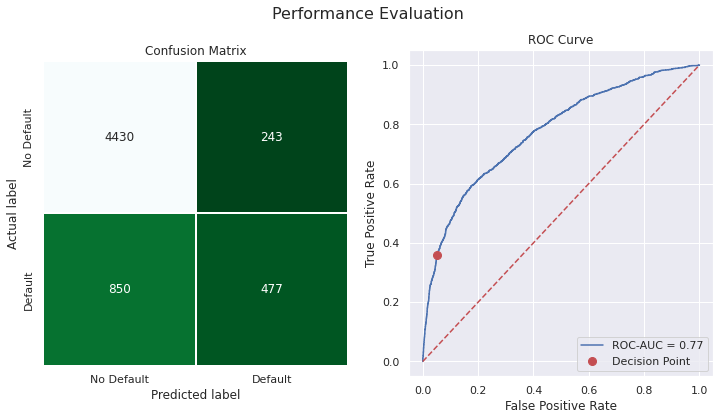

In [51]:
LABELS = ['No Default', 'Default']
tree_perf = performance_evaluation_report(tree_pipeline, X_test, 
                                          y_test, labels=LABELS, 
                                          show_plot=True)

In [52]:
tree_perf

{'accuracy': 0.8178333333333333,
 'precision': 0.6625,
 'recall': 0.359457422758101,
 'specificity': 0.9479991440188316,
 'f1_score': 0.466047874938935,
 'cohens_kappa': 0.36766713720408206,
 'roc_auc': 0.7742092454674362,
 'pr_auc': 0.5431862971400416}

# 그리드 검색 및 교차 검증을 사용해 초매개 변수 조정

In [53]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=2022)

In [54]:
cross_val_score(tree_pipeline, X_train, y_train, cv=k_fold)

array([0.81729167, 0.81791667, 0.82375   , 0.81854167, 0.824375  ])

In [55]:
cross_validate(tree_pipeline, X_train, y_train, cv=k_fold, 
               scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

{'fit_time': array([0.32982254, 0.36089158, 0.33840752, 0.32596898, 0.34040356]),
 'score_time': array([0.06580448, 0.06694913, 0.06724644, 0.06798363, 0.06620932]),
 'test_accuracy': array([0.81729167, 0.81791667, 0.82375   , 0.81854167, 0.824375  ]),
 'test_precision': array([0.65916955, 0.66549296, 0.67940199, 0.66213922, 0.68280467]),
 'test_recall': array([0.35909519, 0.3559322 , 0.38512241, 0.36723164, 0.38512241]),
 'test_roc_auc': array([0.77280727, 0.76675141, 0.78442327, 0.78019254, 0.78741515])}

In [59]:
param_grid = {'classifier__max_depth': range(10, 20),
              'classifier__num_leaves':range(30, 40),
              'classifier__learning_rate':[0.01, 0.05],
              'classifier__n_estimators': [1000]}

In [60]:
classifier_gs = GridSearchCV(tree_pipeline, param_grid, scoring='recall', 
                             cv=k_fold, n_jobs=-1, verbose=1)

classifier_gs.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer())]),
                                                                         ['limit_bal',
                                                                          'age',
                                                                          'bill_statement_sep',
                                                                          'bill_statement_aug',
                                                                          'bill_statement_jul',
                                                                          'bill_statement_jun',
                    

In [61]:
print(f'Best parameters: {classifier_gs.best_params_}') 
print(f'Recall (Training set): {classifier_gs.best_score_:.4f}') 
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_gs.predict(X_test)):.4f}')

Best parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 15, 'classifier__n_estimators': 1000, 'classifier__num_leaves': 39}
Recall (Training set): 0.3765
Recall (Test set): 0.3640


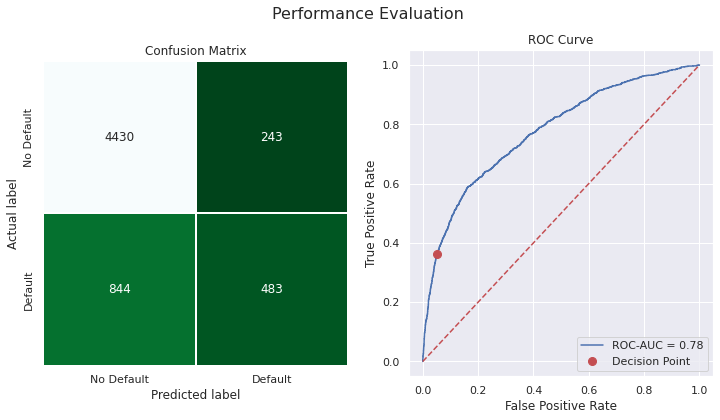

In [63]:
LABELS = ['No Default', 'Default']
tree_gs_perf = performance_evaluation_report(classifier_gs, X_test, 
                                             y_test, labels=LABELS, 
                                             show_plot=True)